In [5]:
from pylab import rcParams
import pandas as pd
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


c:\program files (x86)\python35-32\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning:

pylab import has clobbered these variables: ['plot']
`%matplotlib` prevents importing * from pylab and numpy



In [6]:
rcParams['figure.figsize'] = (8, 5)

In [7]:
df = pd.read_csv('./../../data/video_games_sales.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 1.6+ MB


In [8]:
df = df.dropna()
df['User_Score'] = df.User_Score.astype('float64')
df['Year_of_Release'] = df.Year_of_Release.astype('int64')
df['User_Count'] = df.User_Count.astype('int64')
df['Critic_Count'] = df.Critic_Count.astype('int64')
df.shape

(6825, 16)

In [9]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51,8.0,322,Nintendo,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73,8.3,709,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73,8.0,192,Nintendo,E
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65,8.5,431,Nintendo,E
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41,6.6,129,Nintendo,E


In [10]:
useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre', 
               'Global_Sales', 'Critic_Score', 'Critic_Count',
               'User_Score', 'User_Count', 'Rating'
              ]

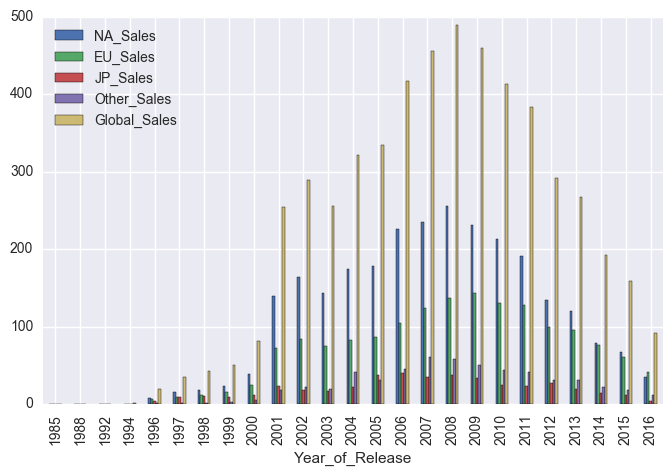

In [11]:
sales_df = df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']]
sales_df.groupby(['Year_of_Release']).sum().plot(kind='bar')

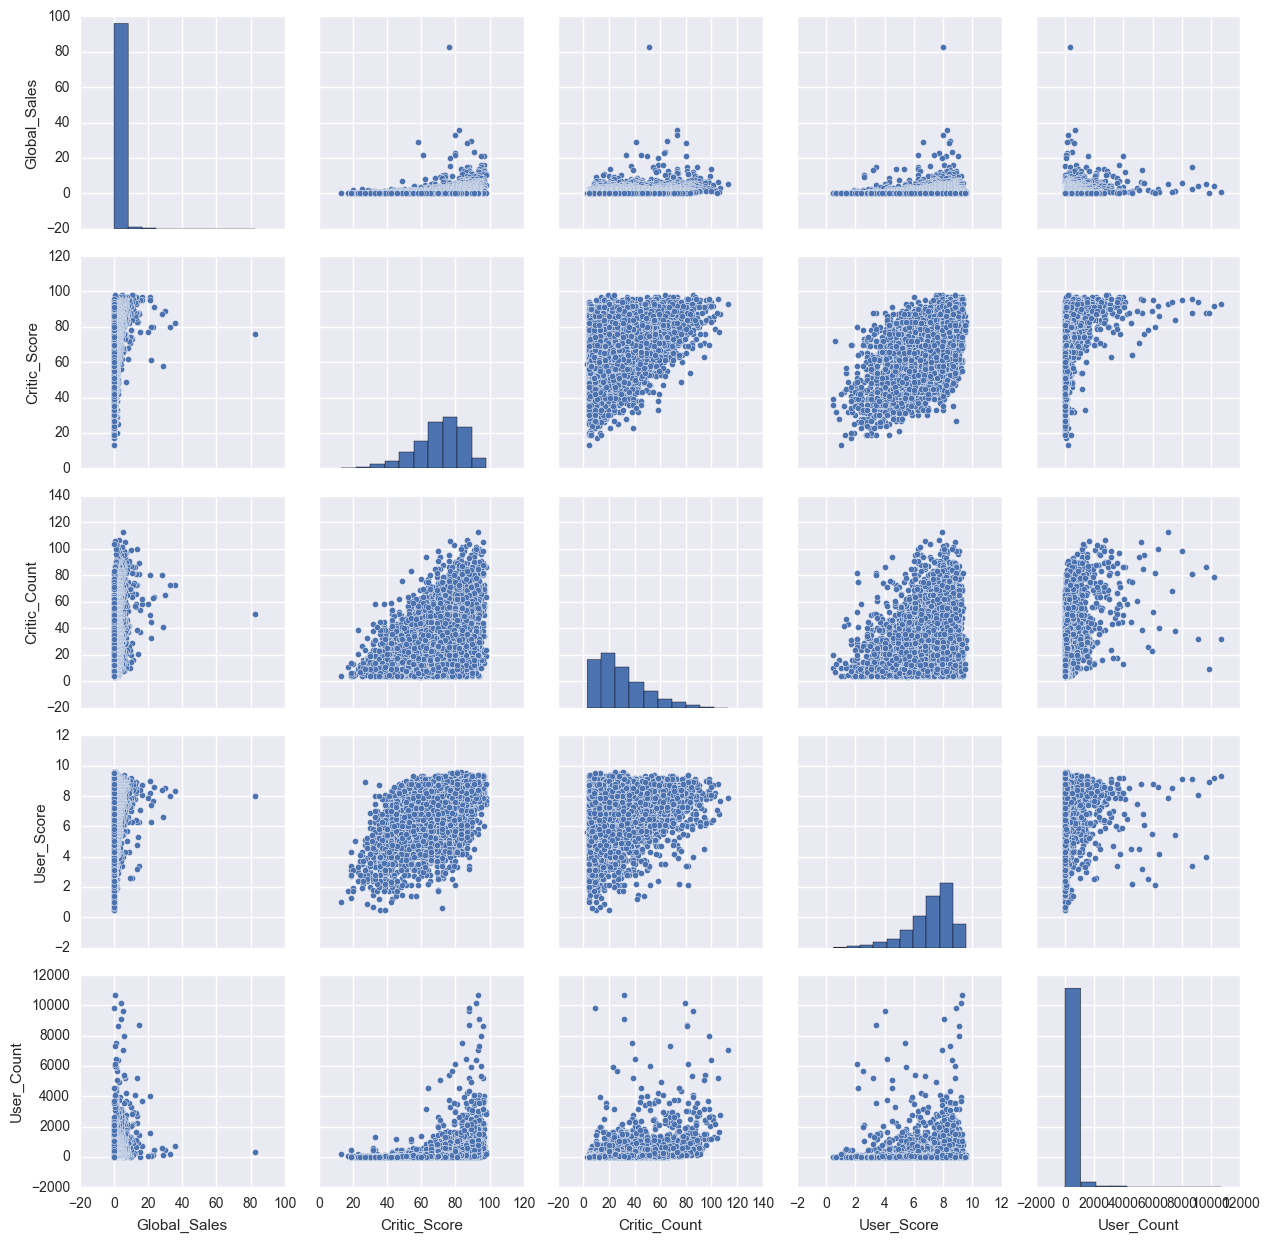

In [12]:
cols = ['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
sns_plot = sns.pairplot(df[cols])

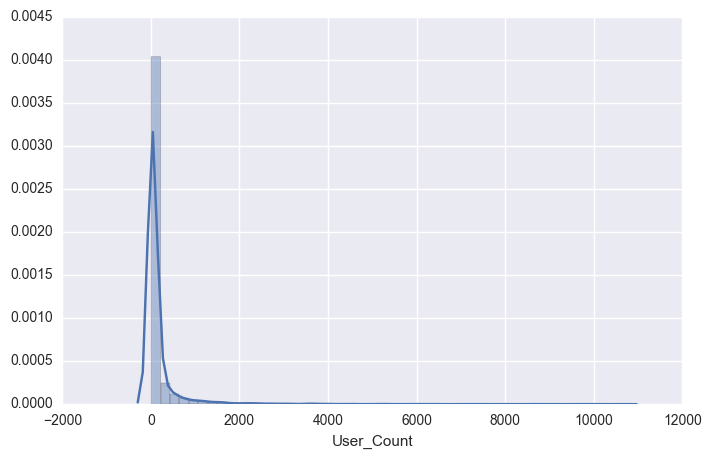

In [13]:
sns.distplot(df['User_Count'])

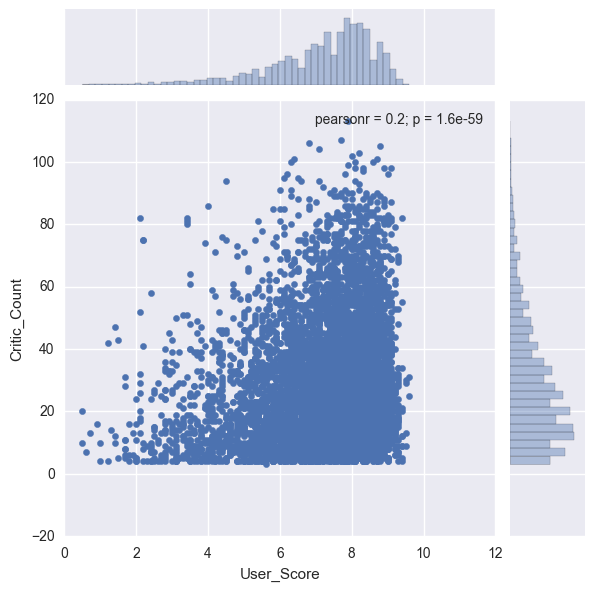

In [14]:
sns.jointplot(df['User_Score'], df['Critic_Count'])

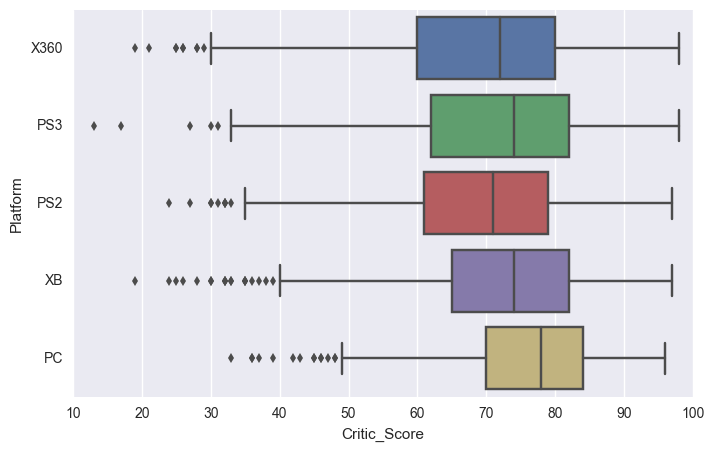

In [15]:
top_platforms = df.Platform.value_counts().sort_values(ascending = False).index[:5]
sns.boxplot(y='Platform', x='Critic_Score', data=df[df['Platform'].isin(top_platforms)])

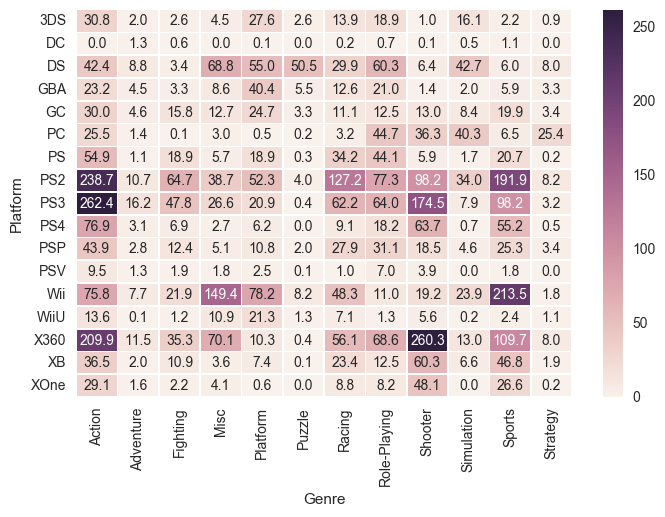

In [16]:
platform_genre_sales = df.pivot_table(index='Platform', columns='Genre', values='Global_Sales', aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5)

In [17]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [19]:
years_df = df.groupby('Year_of_Release')[['Global_Sales']].sum().join(
    df.groupby('Year_of_Release')[['Name']].count()
)
years_df

,Global_Sales,Name
Year_of_Release,,
1985,0.03,1
1988,0.03,1
1992,0.03,1
1994,1.27,1
1996,20.10,7
1997,35.01,13
1998,43.18,25
1999,51.17,30
2000,81.24,102


In [22]:
line1 = go.Scatter(x = years_df.index, y = years_df['Global_Sales'], name='Global sales')
line2 = go.Scatter(x = years_df.index, y = years_df['Name'], name='Number of games')

In [25]:
data = [line1, line2]
layout = {'title': 'Statistics of video games'}
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=True)

In [29]:
platforms_df = df.groupby('Platform')[['Global_Sales']].sum().join(df.groupby('Platform')[['Name']].count())
line1 = go.Bar(x = platforms_df.index, y = platforms_df['Global_Sales'], name='Global sales')
line2 = go.Bar(x = platforms_df.index, y = platforms_df['Name'], name='Number of games')

In [30]:
data = [line1, line2]
layout = {'title': 'Statistics of video games'}
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=True)

In [34]:
data = []
for genre in df['Genre'].unique():
    data.append(go.Box(x = df[df['Genre'] == genre]['Critic_Score'], name = genre ))
iplot(data)

In [33]:
df[df['Genre'] == 'Action']['Critic_Score']

16       97.0
17       95.0
23       97.0
24       95.0
38       97.0
42       97.0
51       98.0
57       98.0
81       88.0
91       88.0
107      95.0
118      92.0
121      96.0
125      95.0
127      85.0
135      95.0
139      87.0
144      96.0
146      94.0
147      94.0
149      95.0
151      89.0
155      80.0
159      91.0
164      96.0
165      97.0
176      84.0
181      90.0
190      90.0
199      84.0
         ... 
15905    57.0
15964    86.0
16027    66.0
16052    67.0
16064    66.0
16087    67.0
16108    65.0
16115    72.0
16145    77.0
16190    80.0
16193    93.0
16205    69.0
16267    75.0
16317    56.0
16320    57.0
16330    77.0
16356    27.0
16377    76.0
16416    67.0
16467    79.0
16490    42.0
16534    51.0
16549    58.0
16588    78.0
16601    65.0
16618    70.0
16624    80.0
16656    81.0
16667    46.0
16696    80.0
Name: Critic_Score, dtype: float64